In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
import sklearn
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split


from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

In [4]:
# loading in the data
df = pd.read_csv('salaries.csv')

<div style="background-color: #8DC4C2; padding: 10px; border-radius: 5px;">
    <h1 style="font-weight: bold; color: blackbold; color: Black;">Exploratory Data Analysis</h1>
</div>

In [5]:
df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [9]:
df.shape

(209499, 43)

In [6]:
df.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [16]:
for i in df.columns:
    print(f"Unique value in {i}:")
    print(df[i].unique(),'\n')

Unique value in ID:
['ID_TZ0000' 'ID_TZ0001' 'ID_TZ0002' ... 'ID_TZ99997' 'ID_TZ99998'
 'ID_TZ99999'] 

Unique value in age:
[79 65 21  2 70 45 53 22 73 30  4 16 43 36  5 88 40 47 59 69 50 27 39 85
 29 41 14 33 67 52 11  9 13 19 26 23 37 58 63 46 62 28 31  3 18 78 15 38
  7 35  1 20  0 48 24 56 25  8 66 71 32 75 51 10 44 42 55 74 77 34 80 17
 83 86 12 68 60 57 64 72 90 61 82  6 84 49 76 54 89 81 87] 

Unique value in gender:
[' Female' ' Male'] 

Unique value in education:
[' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)'] 

Unique value in class:
[nan ' Federal government' ' Private' ' Loca

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [11]:
# let's take a look at the target column
df['income_above_limit'].unique()

array(['Below limit', 'Above limit'], dtype=object)

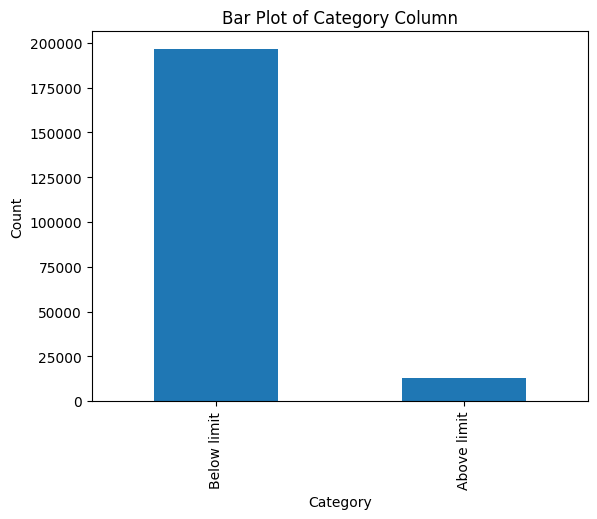

In [15]:
# checking out the target column in more detail
# note that we can see that the data set is imbalanced 
df['income_above_limit'].value_counts().plot(kind='bar')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot of Category Column')
plt.show()




<div style="background-color: #8DC4C2; padding: 10px; border-radius: 5px;">
    <h2 style="color: Black;">Initial Thoughts</h1>
    <p style="color: black;">  </p>
    <p style="color: black;">- the target class is imbalanced </p>
    <p style="color: black;">- there are 43 columns and approximately 209.5k rows of data  </p>
    <p style="color: black;">- we're dealing with a lot of categorical data  </p>
    <p style="color: black;">- there are some numerical fields like age but the other numerical columns are technically categories (think of it as label/ordinal encoding already done on the dataset)  </p>
 
   
</div>



<div style="background-color: #8DC4C2; padding: 10px; border-radius: 5px;">
    <h3 style="color: black;">Missing Values and Duplicates</p>
</div>


In [17]:
df.duplicated().sum()

0

In [21]:
# let's try to see if there are any special characters in the data set 
special_char_info = df.apply(lambda x: x[x == '?'].count())
special_char_info

ID                                0
age                               0
gender                            0
education                         0
class                             0
education_institute               0
marital_status                    0
race                              0
is_hispanic                       0
employment_commitment             0
unemployment_reason               0
employment_stat                   0
wage_per_hour                     0
is_labor_union                    0
working_week_per_year             0
industry_code                     0
industry_code_main                0
occupation_code                   0
occupation_code_main              0
total_employed                    0
household_stat                    0
household_summary                 0
under_18_family                   0
veterans_admin_questionnaire      0
vet_benefit                       0
tax_status                        0
gains                             0
losses                      

- note that we're trying to find special characters like '?' for example so that we can replace it with NaN (this helps us get the correct percentage of missing data in each column)

In [14]:
missing_values_info = df.isnull().sum()
missing_values_info

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

- there seems to be a lot of missing data in some columns
- there are no duplicates in the data set 
- let's look into the missing data using the missingno library 

<AxesSubplot: >

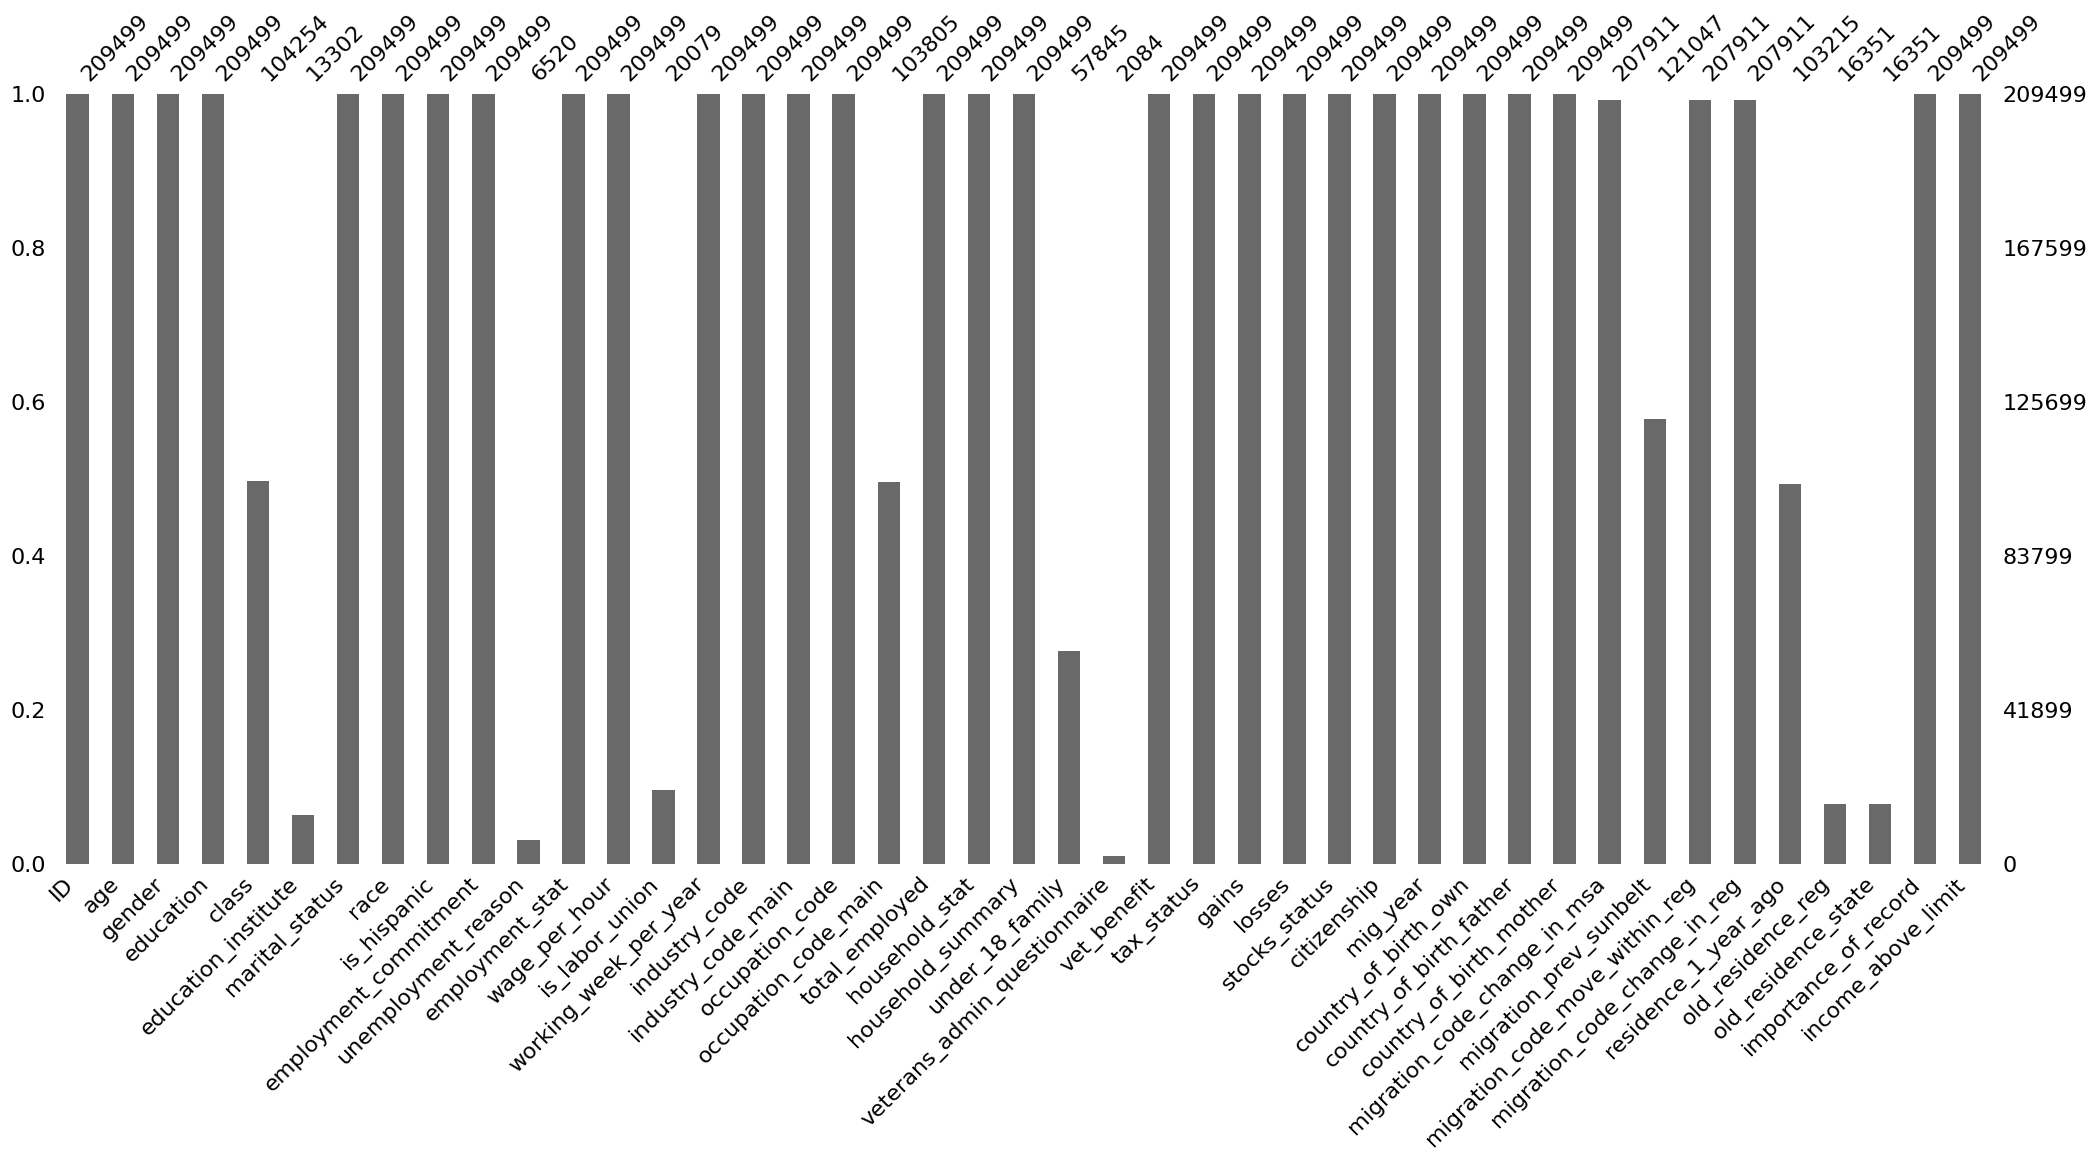

In [18]:
msno.bar(df)

In [19]:
# let's try to approximately quantify the amount of missing data for each column 
missing_values = df.isnull().sum()
percentage = (missing_values*100)/len(df)
missing_data_df = pd.concat([missing_values,percentage],axis=1)
missing_data_df.rename(columns={0: 'missing_data_points', 1: 'percentage of missing data'}, inplace=True)
missing_data_df[missing_data_df['missing_data_points']>0].sort_values(by='percentage of missing data', ascending=False)


,missing_data_points,percentage of missing data
veterans_admin_questionnaire,207415,99.005246
unemployment_reason,202979,96.887813
education_institute,196197,93.650566
old_residence_reg,193148,92.195189
old_residence_state,193148,92.195189
is_labor_union,189420,90.415706
under_18_family,151654,72.388890
residence_1_year_ago,106284,50.732462
occupation_code_main,105694,50.450837
class,105245,50.236517


### Thoughts about missing data
- the percentage of missing data in each column ranges from 0.7% to 99%
- a few columns have a high percentage of missing data
- most columns have no missing data at all 
- it's a better choice to drop the columns with more than 70% of missing data (doesn't make sense to try to impute the missing data)
- it definitely makes sense to impute the data with columns missing less than 1% of data
- for the columns with a moderate amount of missing data (40%-50%), we can try to dig deeper into the data and arrive at a conclusion whether to impute them or to drop them 

In [23]:
df.drop(['veterans_admin_questionnaire', 'unemployment_reason', 'education_institute', 'old_residence_reg', 'old_residence_state', 'is_labor_union', 'under_18_family'], axis = 1, inplace = True)

<AxesSubplot: >

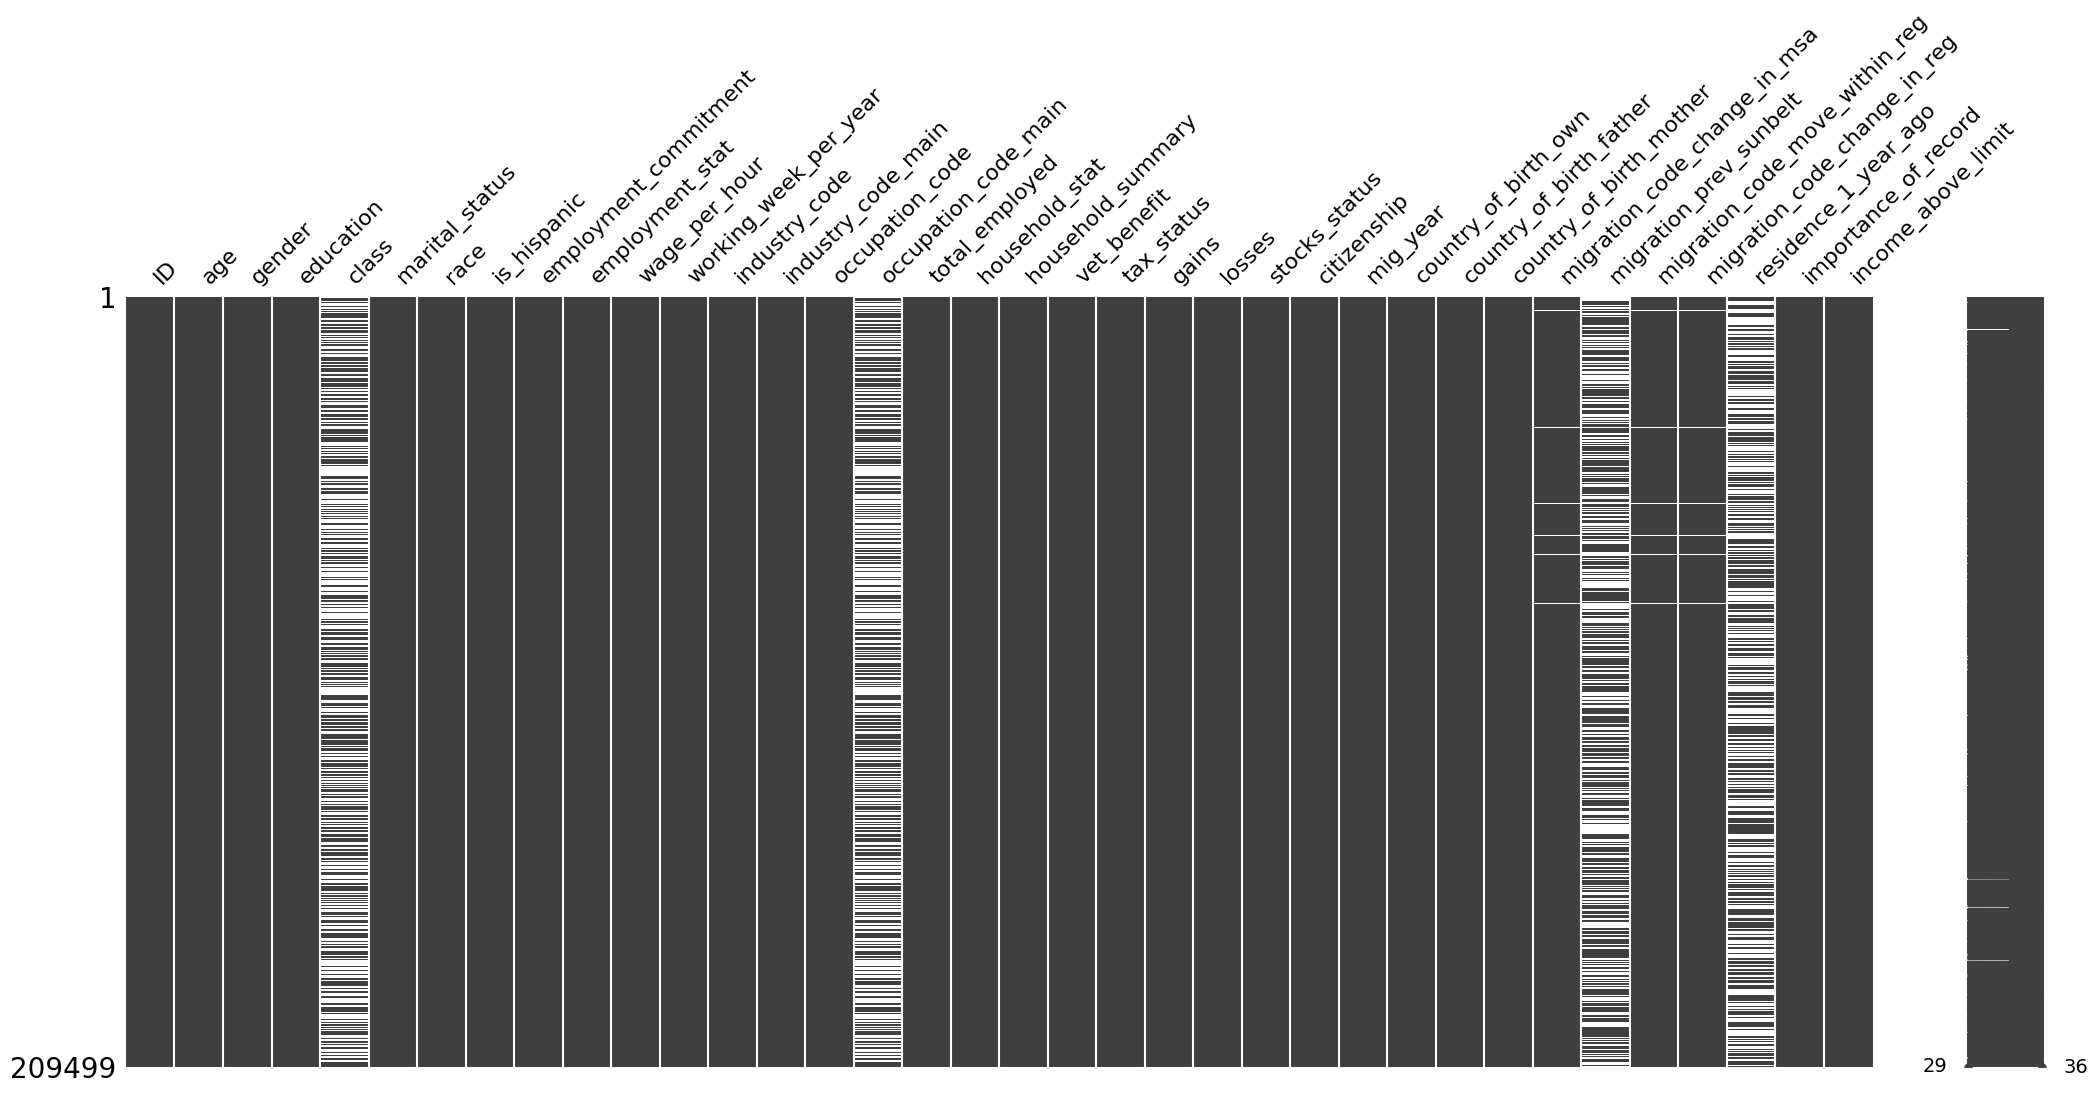

In [25]:
msno.matrix(df)

- at first glance, the missing data seems to be missing at random
- let's take a look at the heatmap which correlates missing data between columns 

<AxesSubplot: >

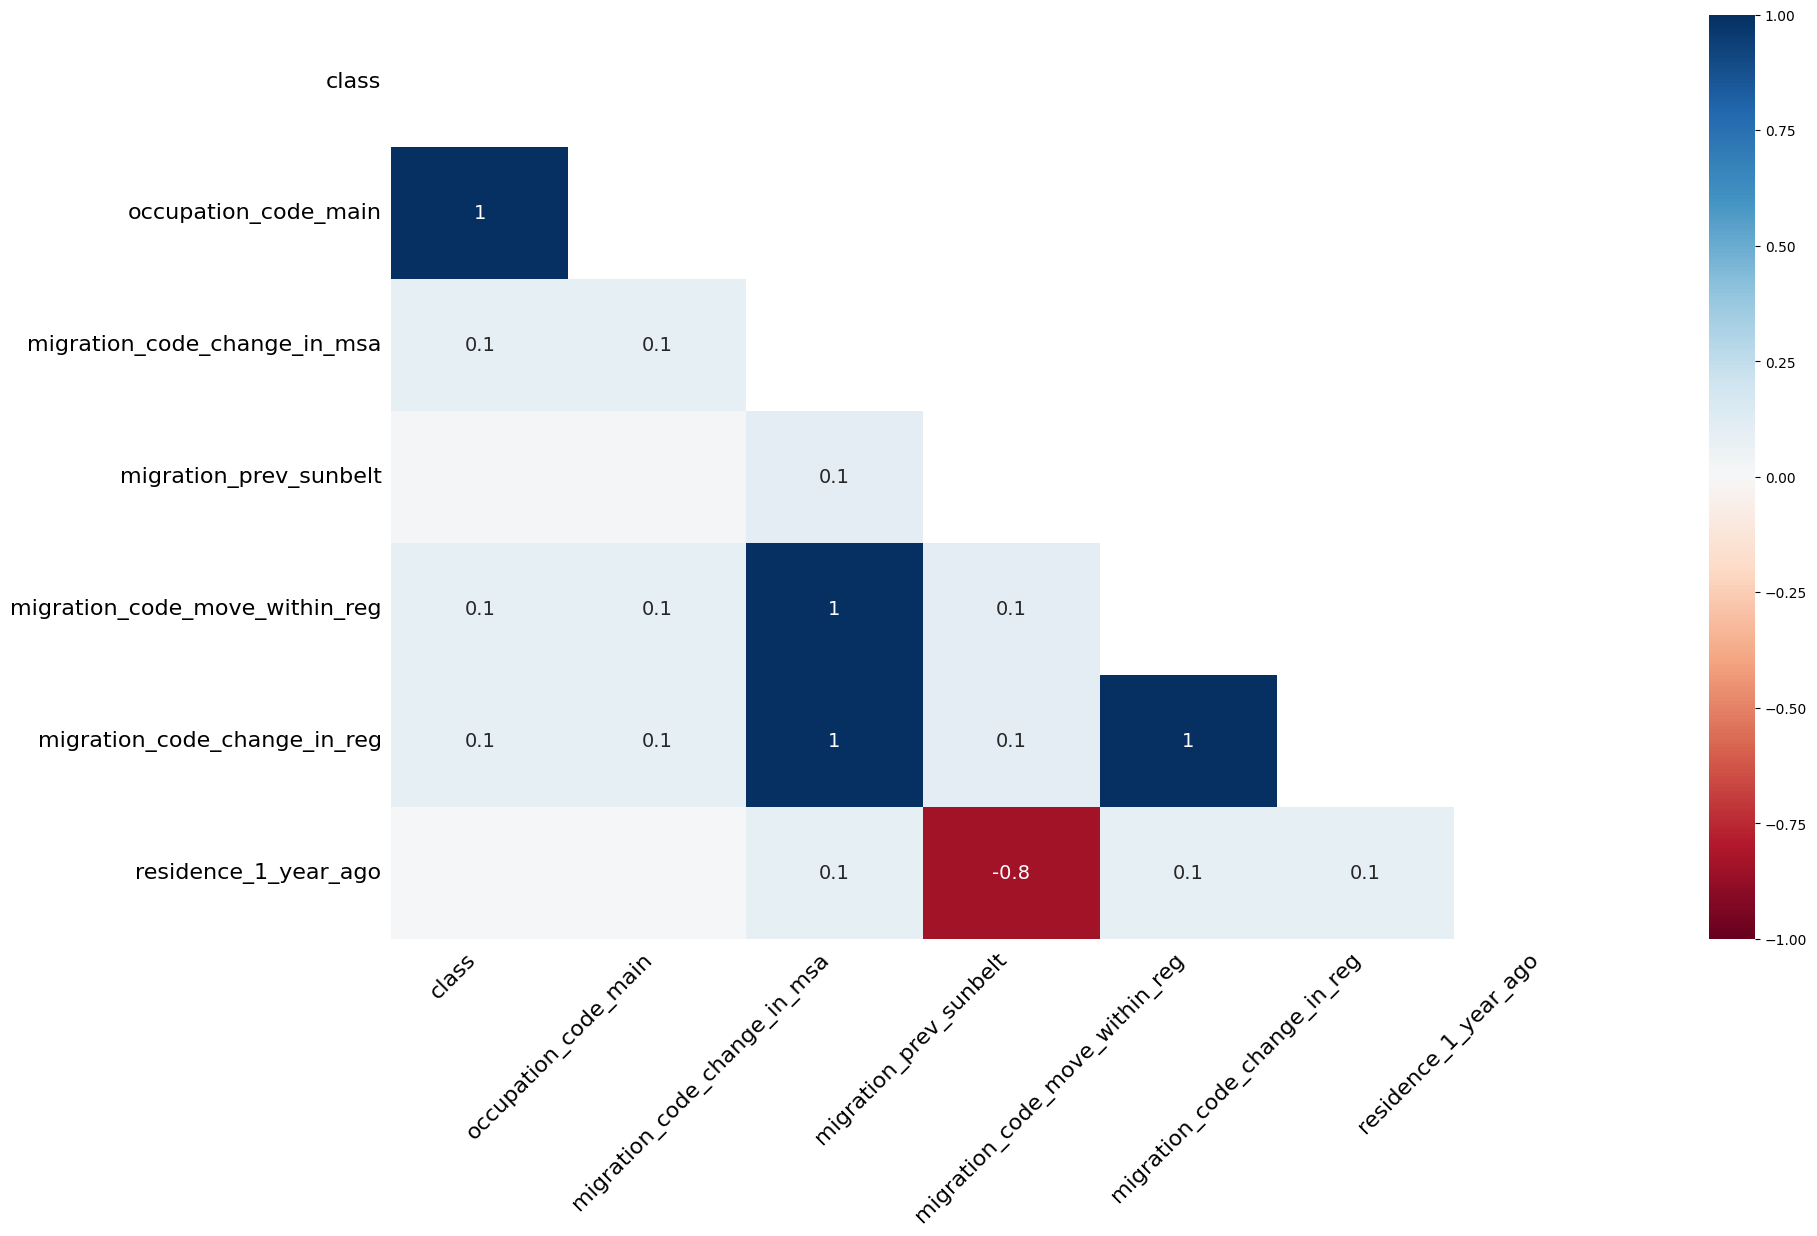

In [26]:
msno.heatmap(df)

- migration_code_change_in_msa and migration_code_move_within_reg are highly correlated but it can be ignored since less than 1% of data is missing 
- migrations_prev_sunbelt and residence_1_year_ago are also highly (negatively) correlated and both columns are missing upwards of 40% of data

<AxesSubplot: >

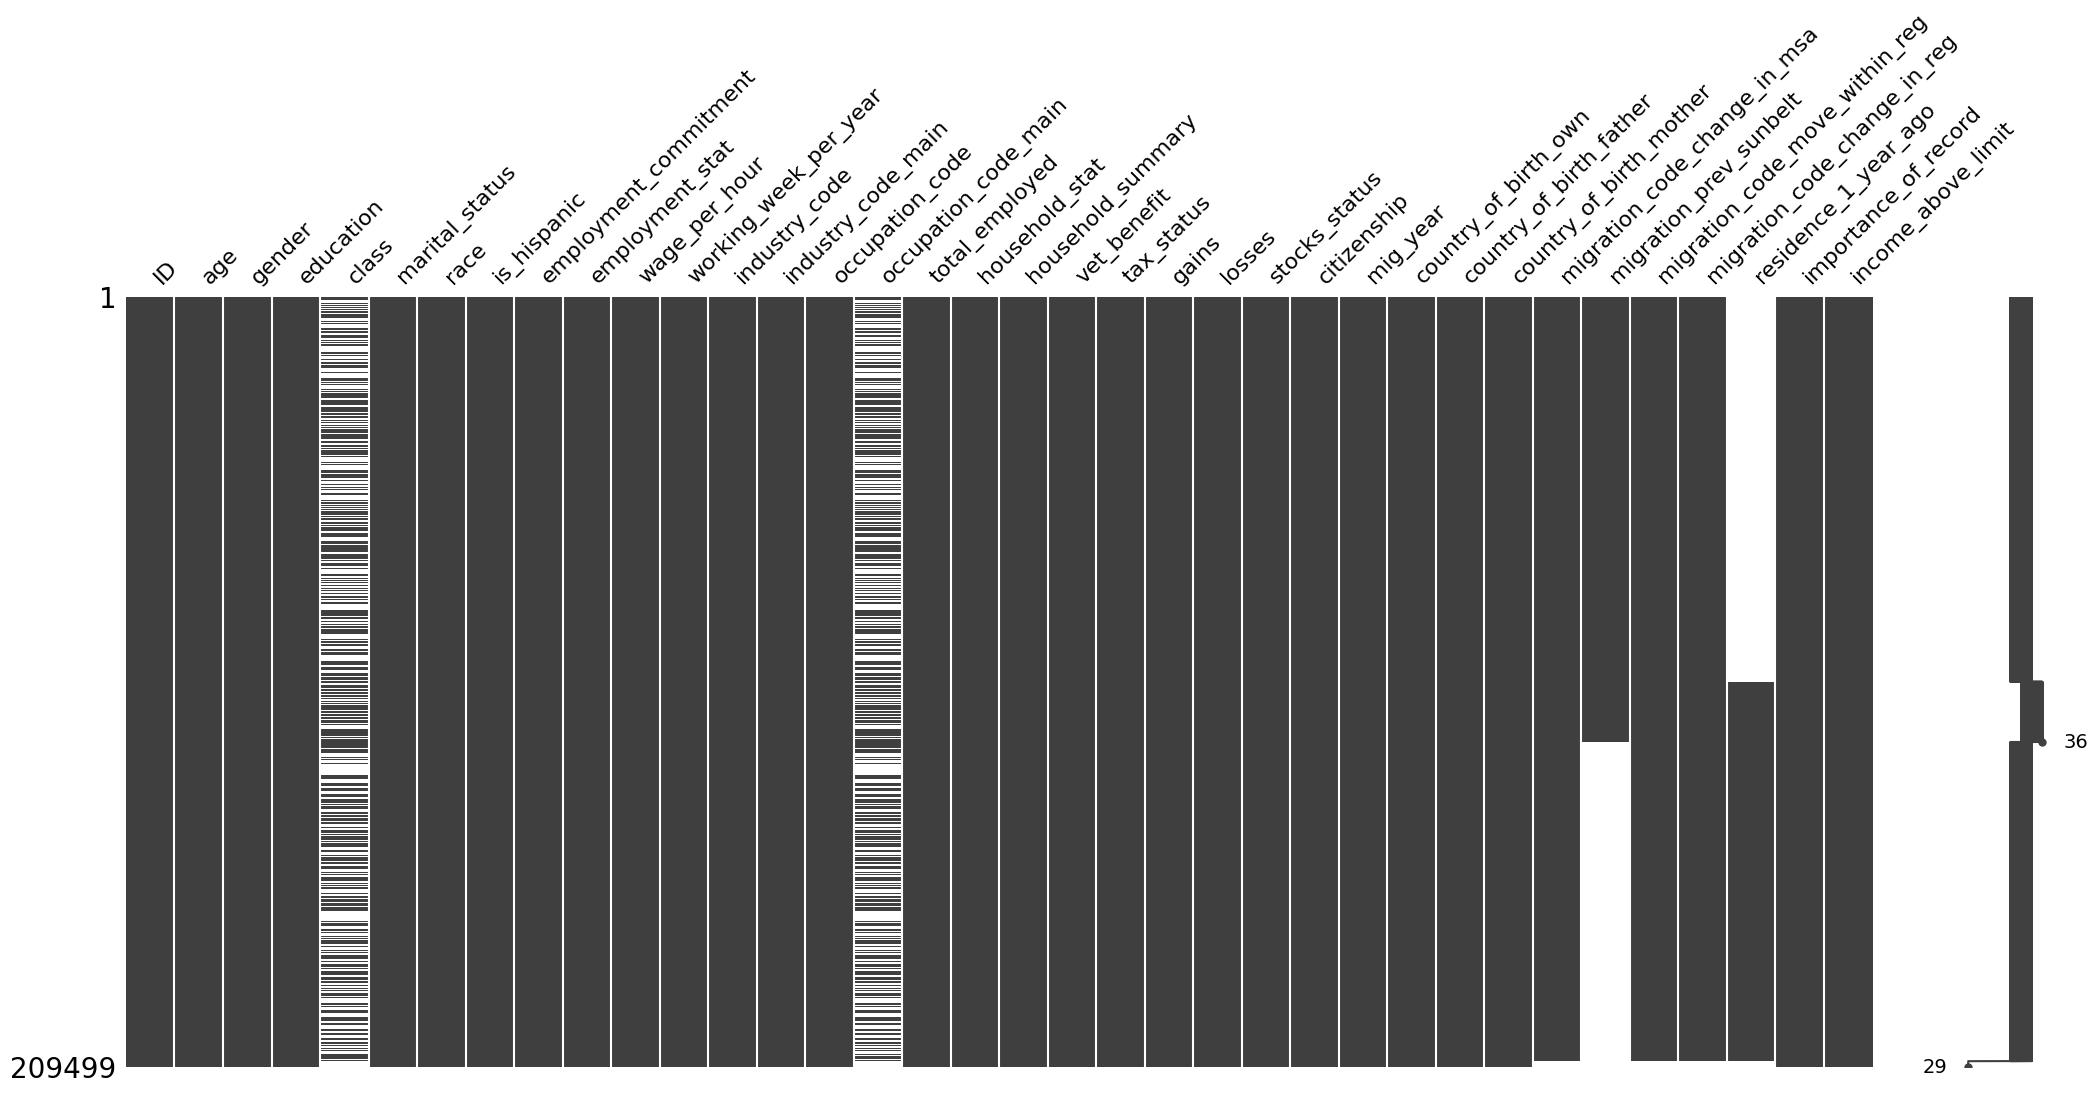

In [27]:
msno.matrix(df.sort_values('migration_code_change_in_msa'))

- let's just go ahead and drop the columns with more than 40% of missing data (we can always come back later if our model is not performing well)
- we will impute the remaining columns using the mode in the preprocessing stage 

In [28]:
df.drop(['residence_1_year_ago', 'occupation_code_main', 'class', 'migration_prev_sunbelt'], axis = 1, inplace = True)

<div style="background-color: #8DC4C2; padding: 10px; border-radius: 5px;">
    <h1 style="font-weight: bold; color: blackbold; color: Black;">Data Profiling</h1>
</div>

In [31]:
df.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,34.518728,0.176760,55.433487,23.158850,15.332398,11.321734,1.956067,1.515854,435.926887,36.881737,194.533420,94.499745,1740.888324
std,22.306738,0.555562,276.757327,24.397963,18.049655,14.460839,2.365154,0.850853,4696.359500,270.383302,1956.375501,0.500001,995.559557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,37.870000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1061.290000
50%,33.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1617.040000
75%,50.000000,0.000000,0.000000,52.000000,33.000000,26.000000,4.000000,2.000000,0.000000,0.000000,0.000000,95.000000,2185.480000
max,90.000000,2.000000,9999.000000,52.000000,51.000000,46.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000,95.000000,18656.300000


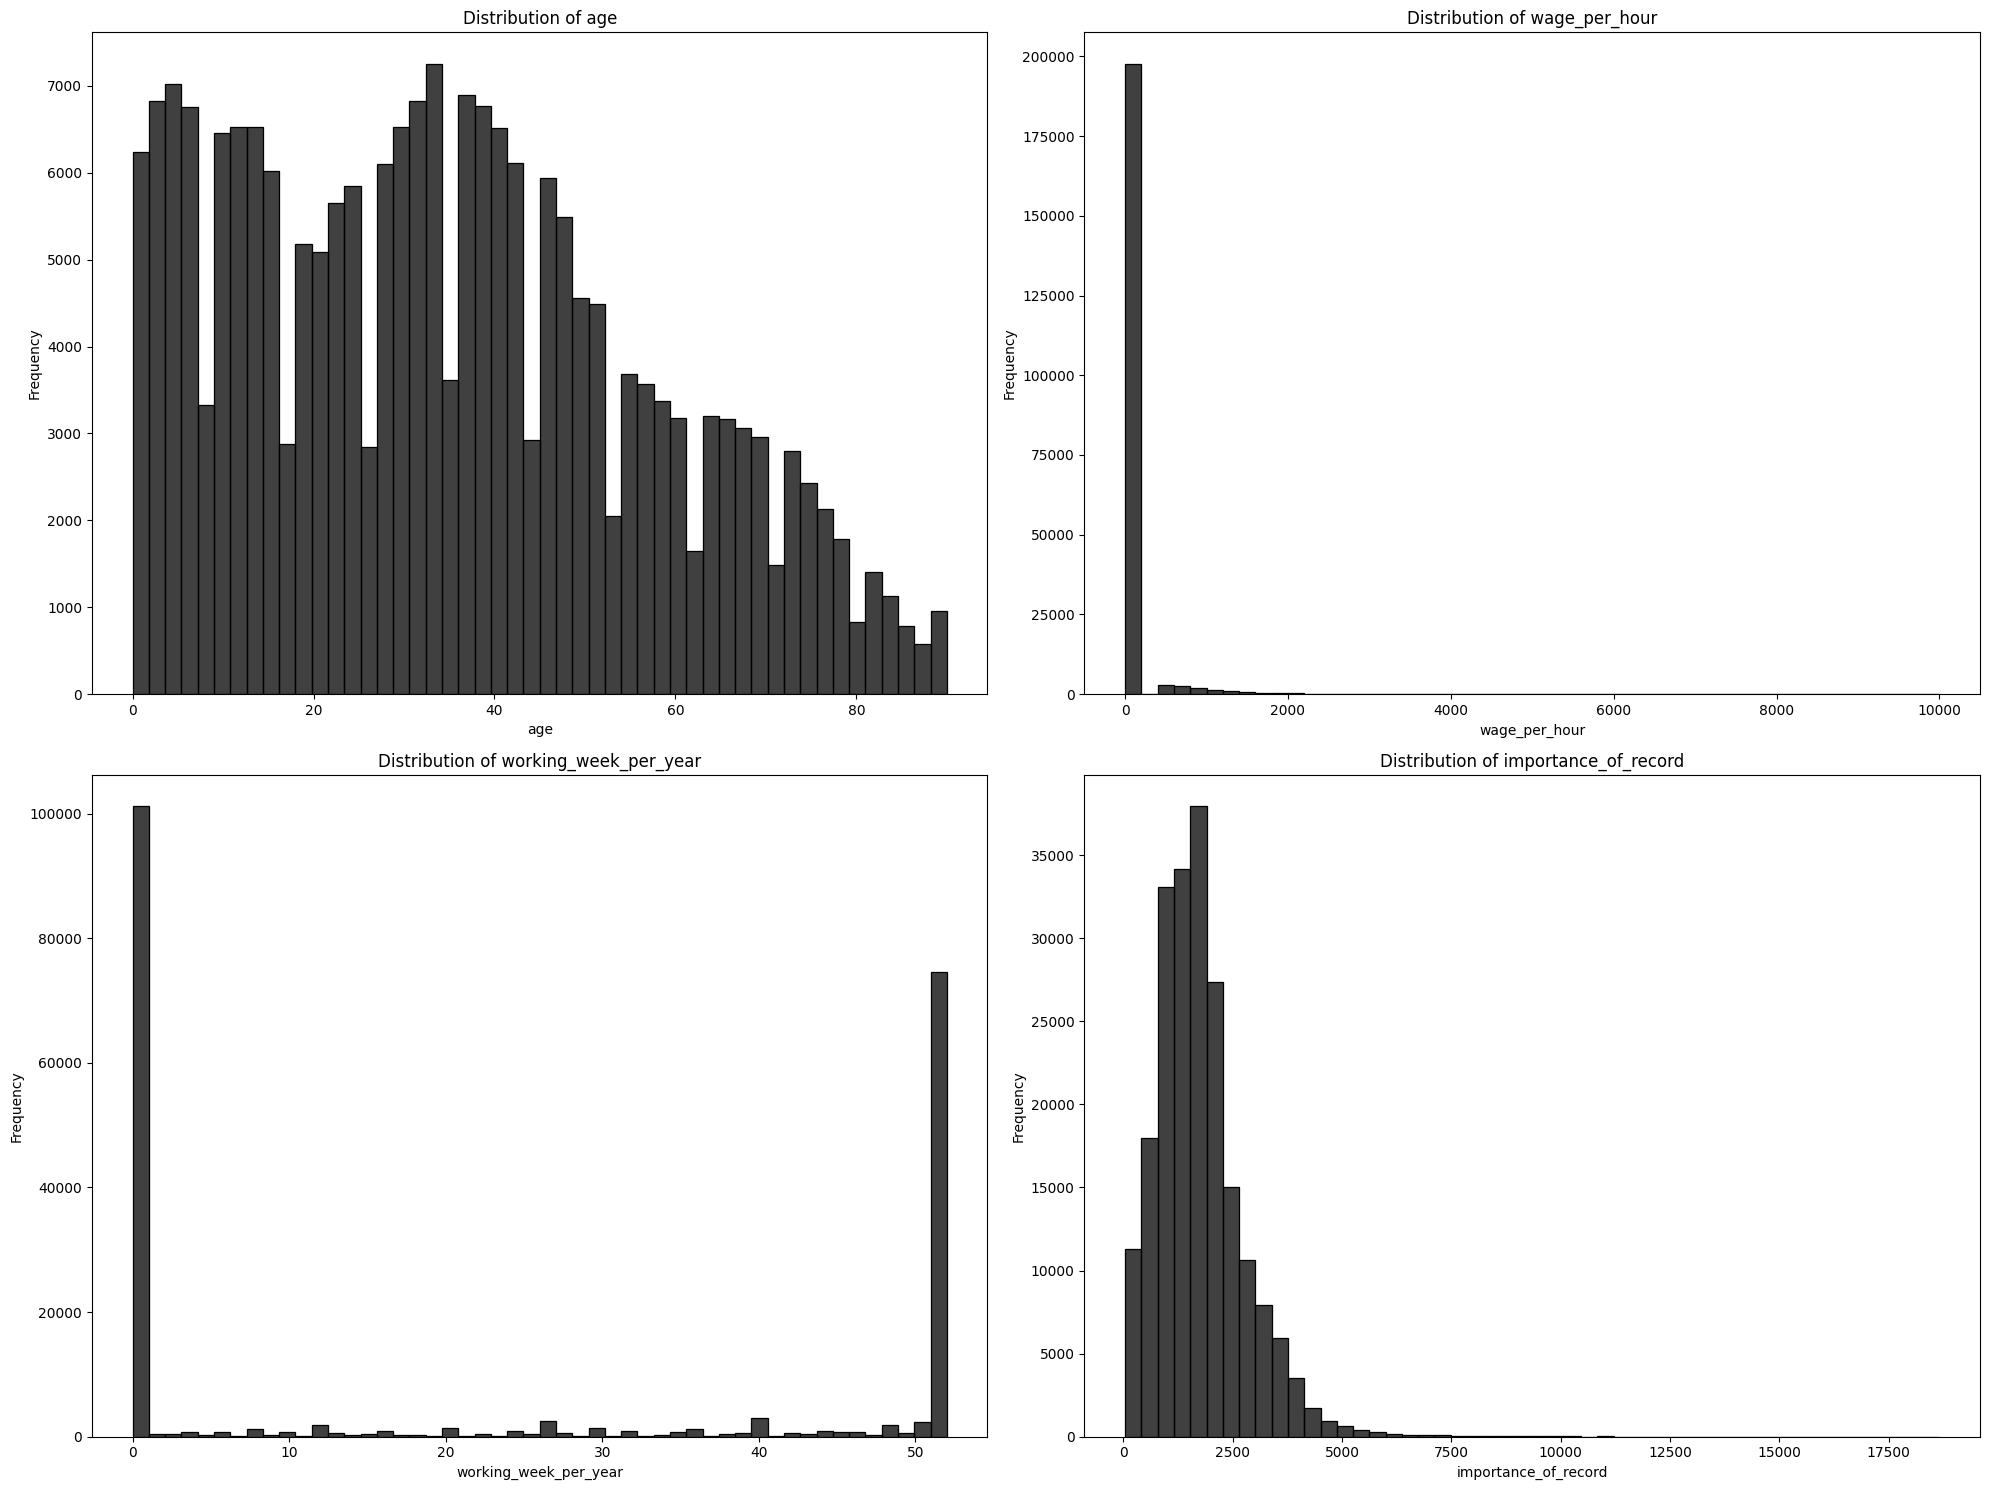

In [41]:
plt.figure(figsize=(20, 15))

# List of numerical columns to plot
num_cols_to_plot = ['age', 'wage_per_hour', 'working_week_per_year', 'importance_of_record']

# Plot histograms
for i, col in enumerate(num_cols_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=50, kde=False, color='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- a lot of people seem to be making no money per hour

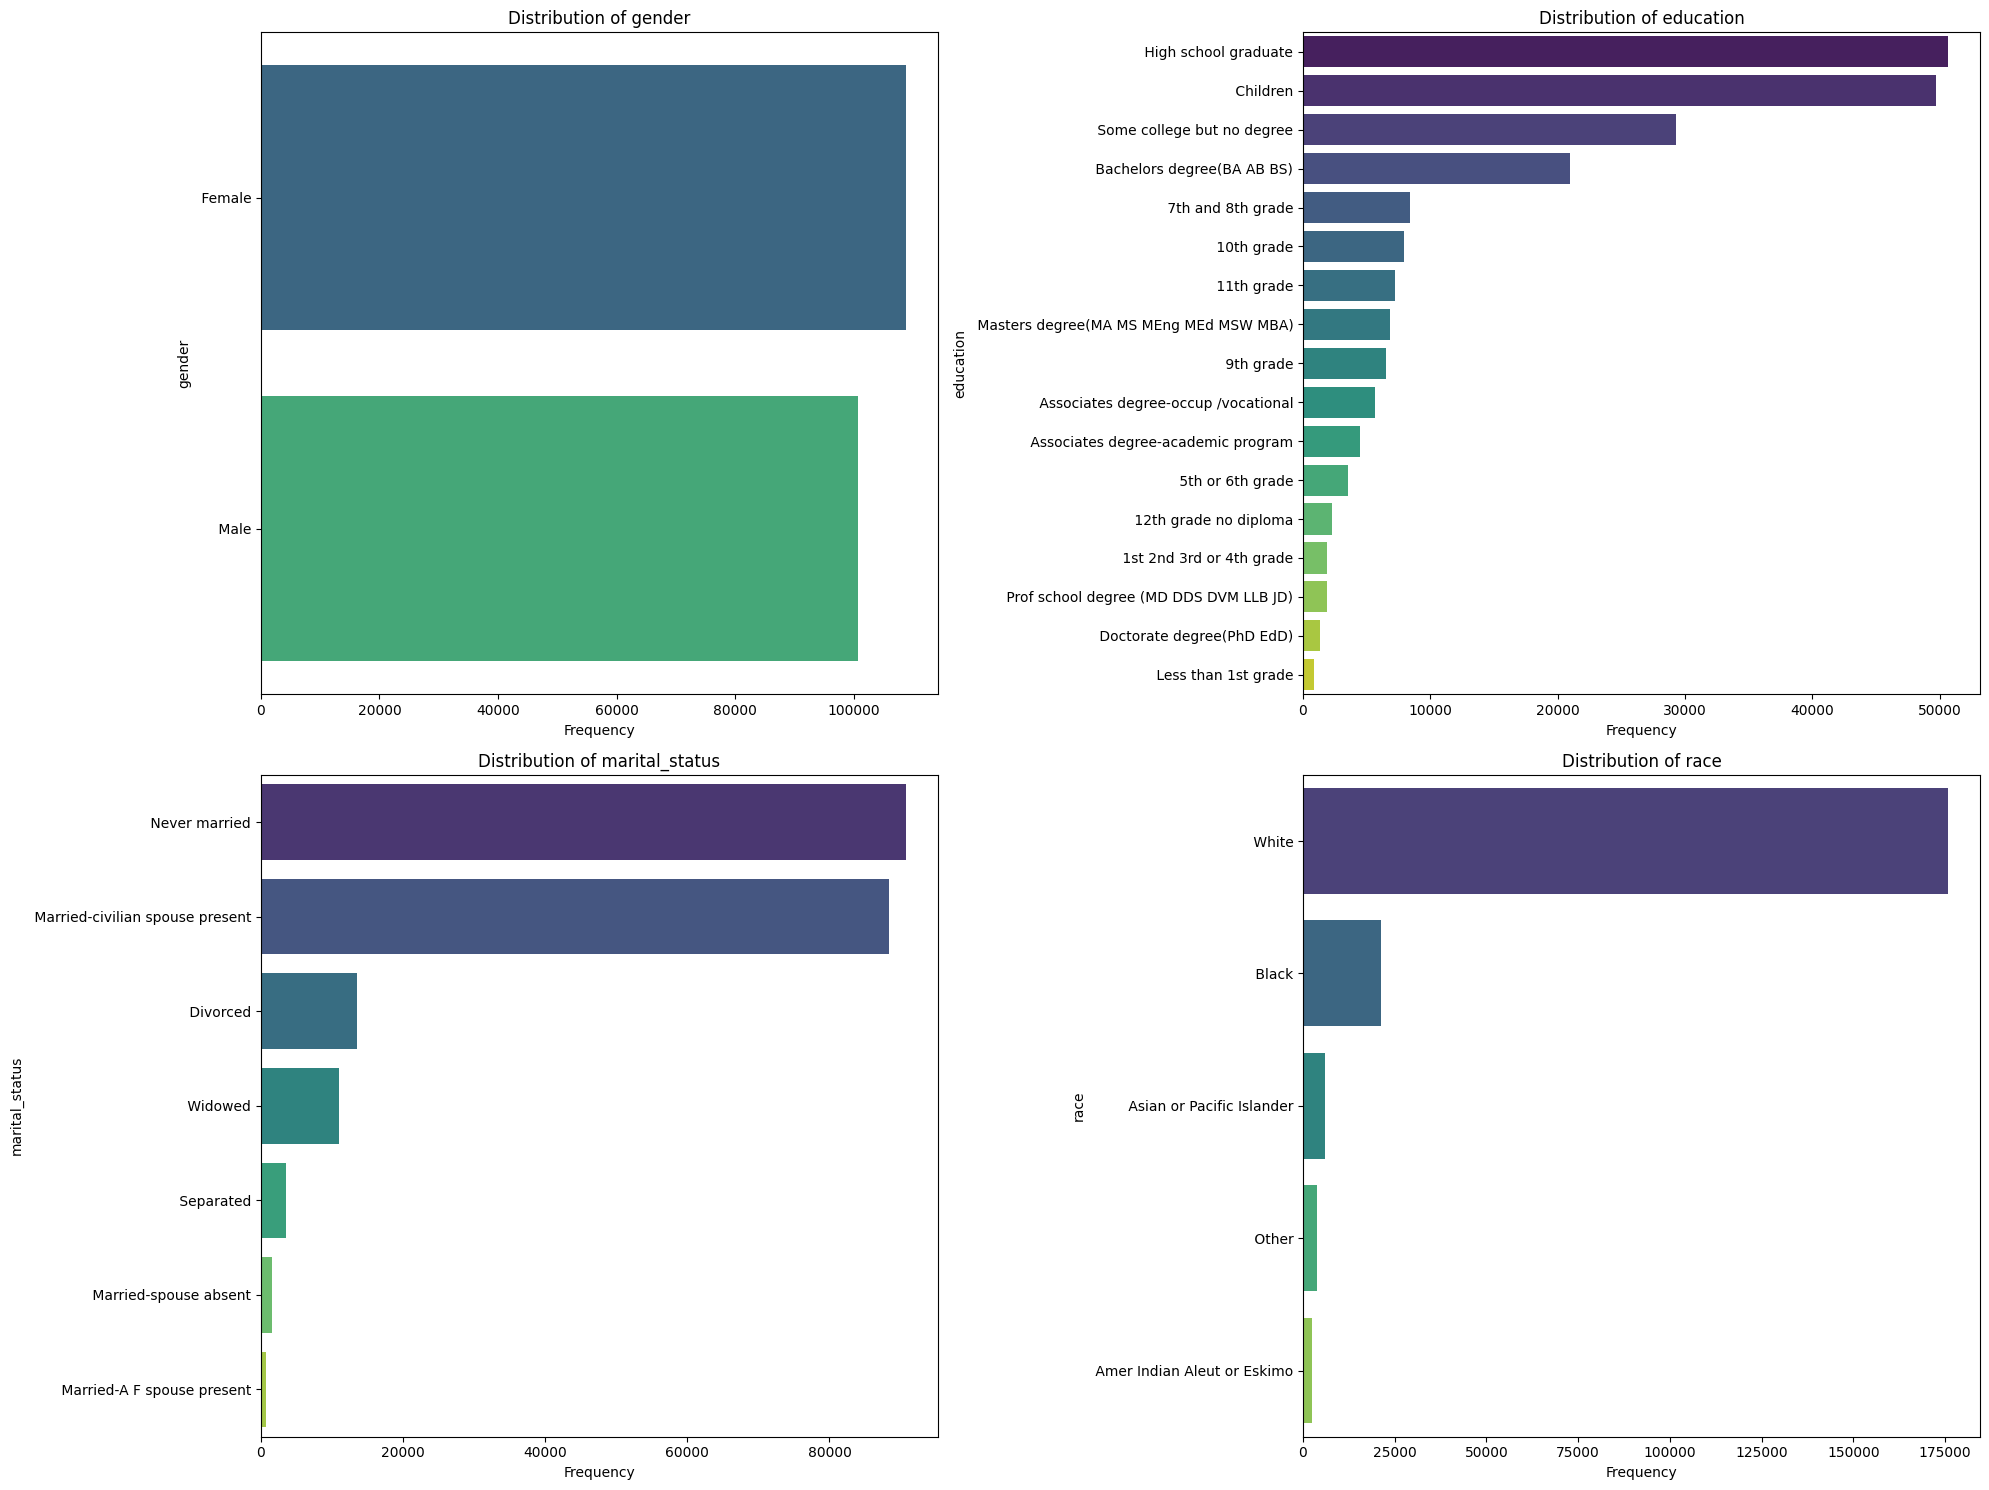

In [35]:
plt.figure(figsize=(20, 15))

# List of categorical columns to plot
cat_cols_to_plot = ['gender', 'education', 'marital_status', 'race']

# Plot bar charts
for i, col in enumerate(cat_cols_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Frequency')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

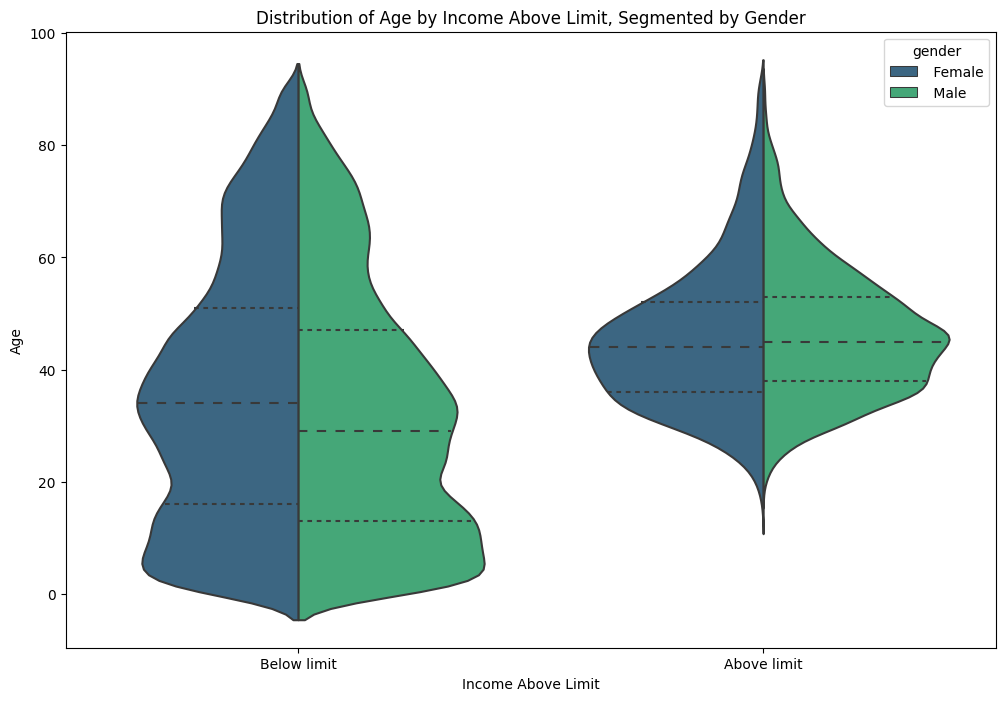

In [37]:
plt.figure(figsize=(12, 8))

# Create a violin plot for age vs income_above_limit, segmented by gender
sns.violinplot(x='income_above_limit', y='age', hue='gender', data=df, split=True, inner="quartile",palette='viridis')

plt.title('Distribution of Age by Income Above Limit, Segmented by Gender')
plt.xlabel('Income Above Limit')
plt.ylabel('Age')

plt.show()

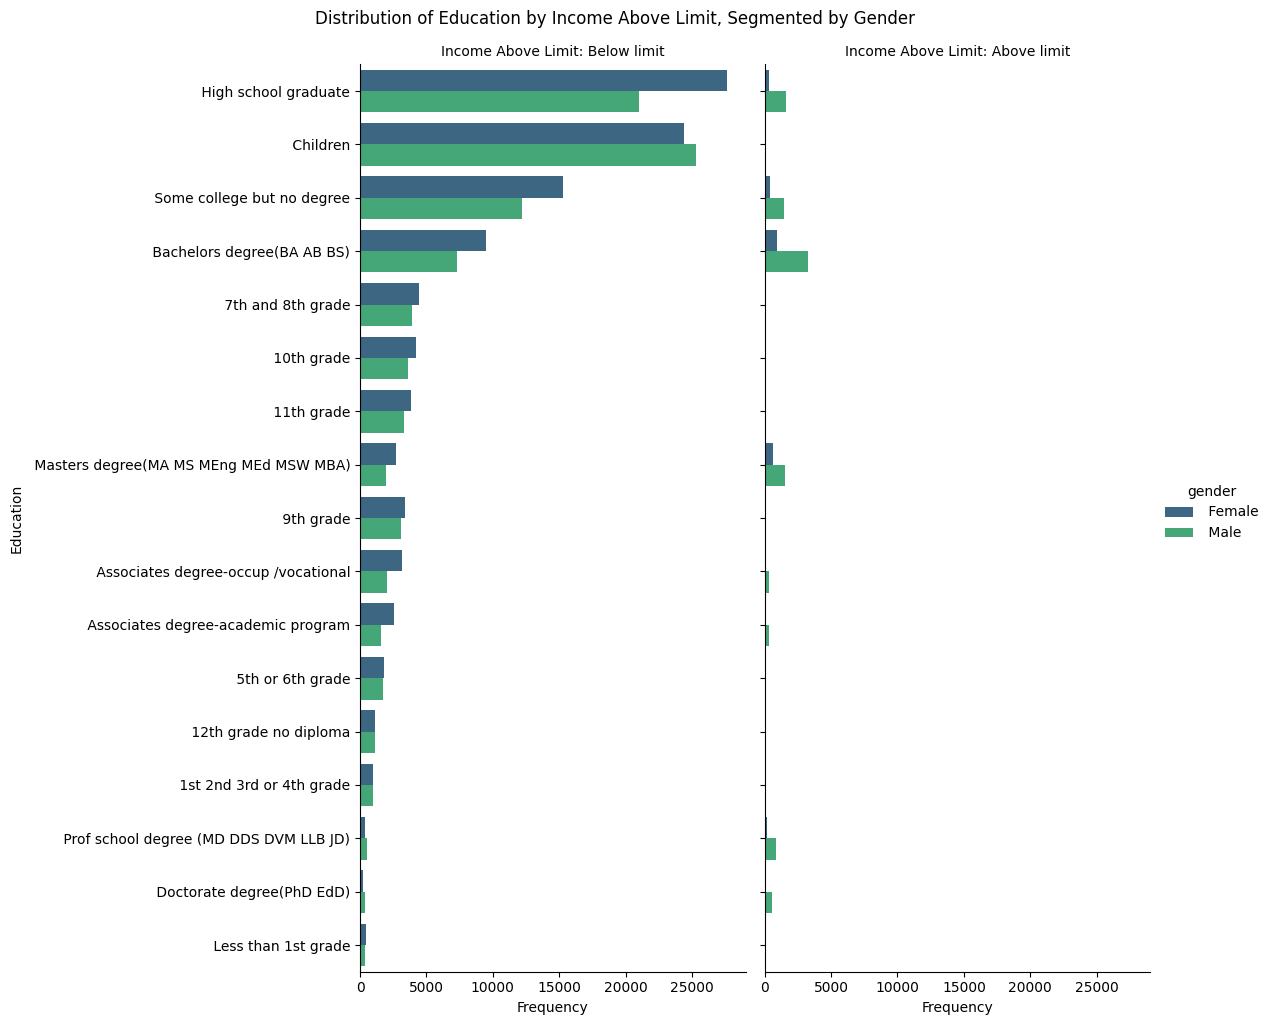

In [38]:
g = sns.catplot(data=df, y='education', hue='gender', col='income_above_limit',
                kind='count', order=df['education'].value_counts().index, 
                palette='viridis', height=10, aspect=0.6)

g.set_axis_labels("Frequency", "Education")
g.set_titles("Income Above Limit: {col_name}")
g.fig.suptitle('Distribution of Education by Income Above Limit, Segmented by Gender', y=1.02)

plt.show()

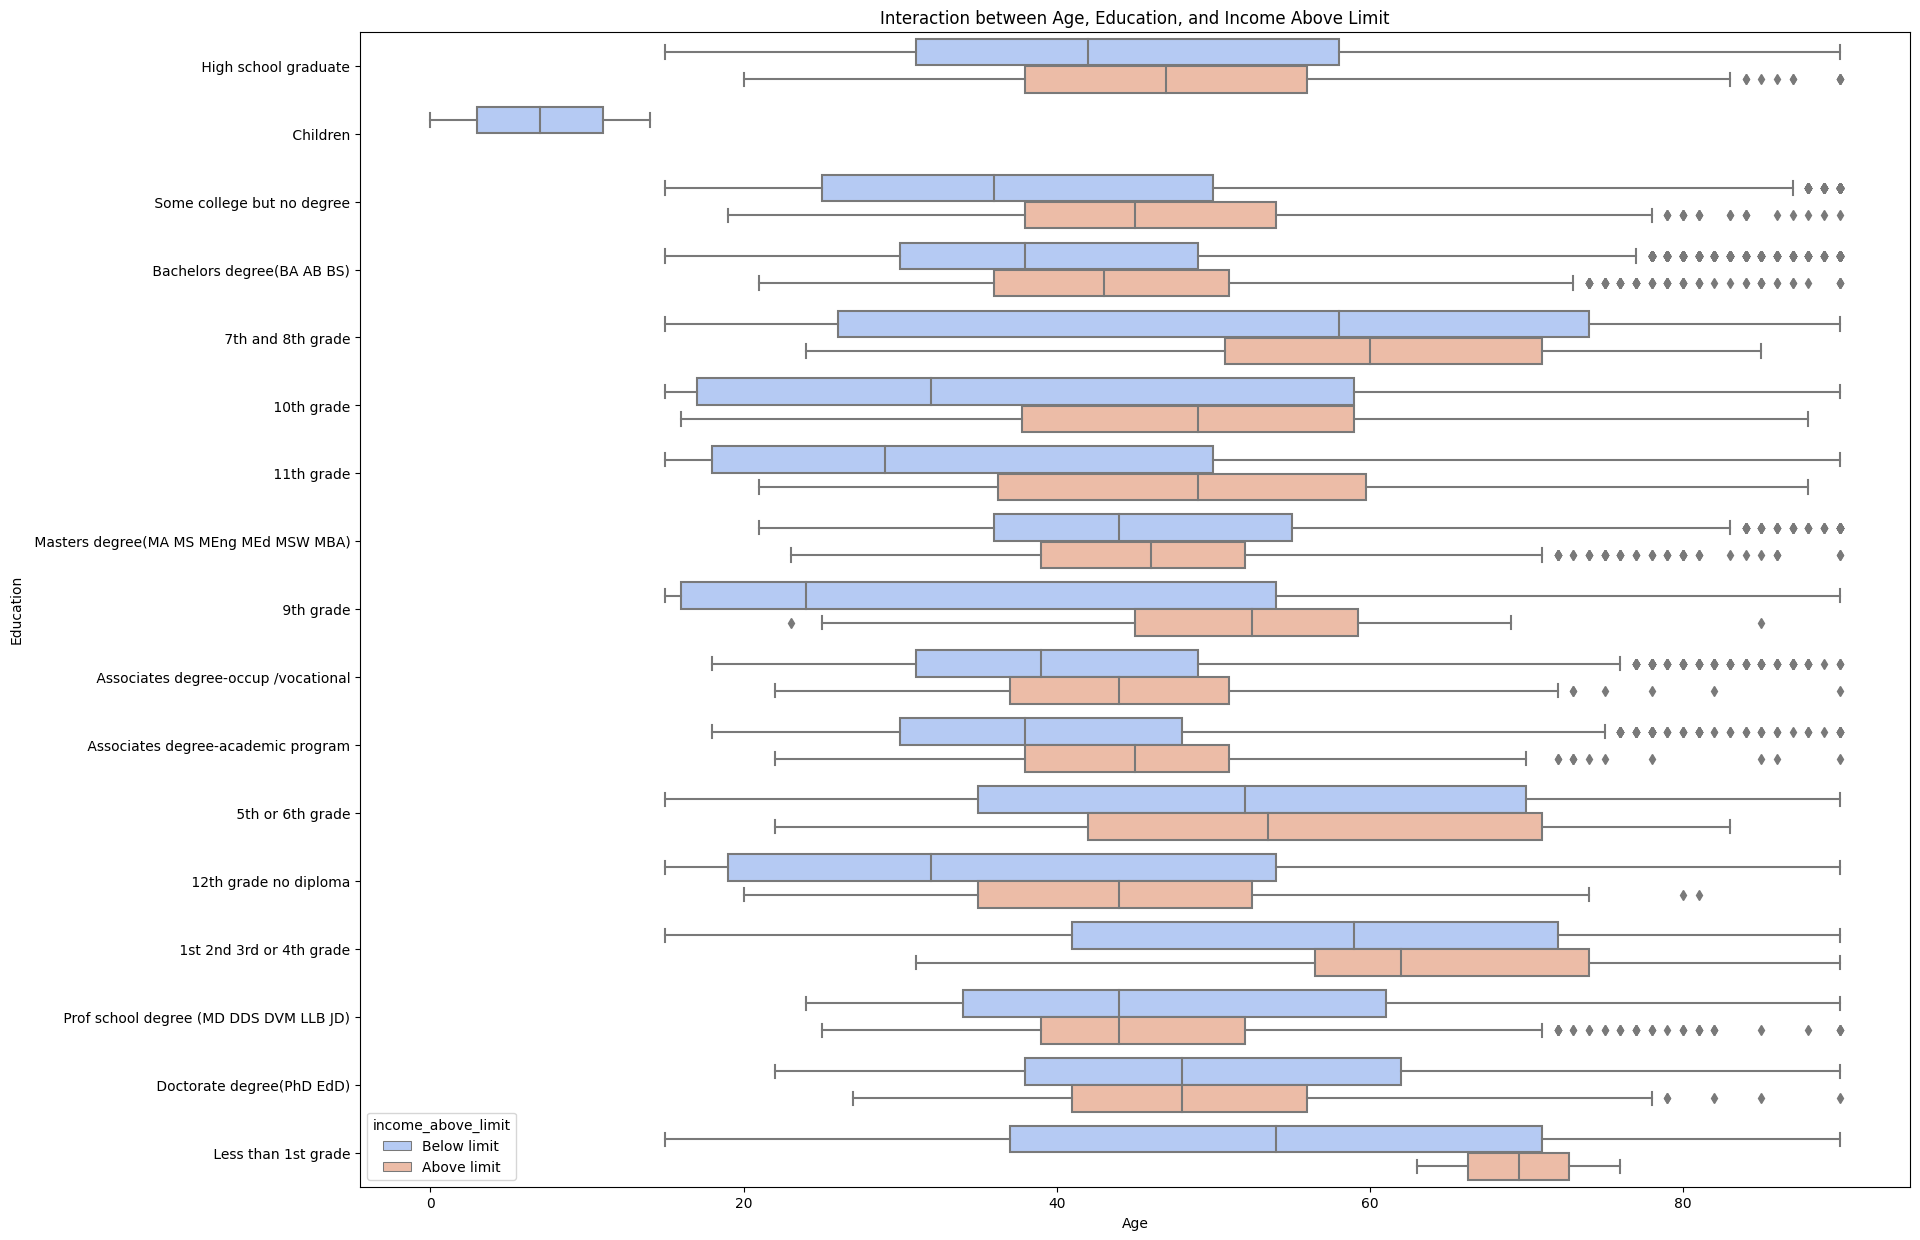

In [42]:
plt.figure(figsize=(20, 15))

# Create a boxplot for age vs education segmented by income_above_limit
sns.boxplot(x='age', y='education', hue='income_above_limit', data=df, 
            order=df['education'].value_counts().index, palette='coolwarm')

plt.title('Interaction between Age, Education, and Income Above Limit')
plt.xlabel('Age')
plt.ylabel('Education')

plt.show()




<div style="background-color: #8DC4C2; padding: 10px; border-radius: 5px;">
    <h2 style="color: Black;">Observations</h1>
    <p style="color: black;">  </p>
    <p style="color: black;">- the dataset seems fairly balanced between male and female individuals </p>
    <p style="color: black;">- as you would probably expect, the number of people decrease as the level or education goes up  </p>
    <p style="color: black;">- the majority of inividuals in the dataset are white   </p>
    <p style="color: black;">- Across most education levels, the median age for individuals with income "Above limit" is generally higher than those "Below limit". This trend is particularly pronounced in categories like "Doctorate degree(PhD EdD)" and "Prof school degree (MD DDS DVM LLB JD)"  </p>
    <p style="color: black;">- Individuals with higher education levels like "Doctorate degree(PhD EdD)" and "Prof school degree (MD DDS DVM LLB JD)" are generally older and more likely to have incomes "Above limit"  </p>
    <p style="color: black;">- looking at the violin plot, in the "Above limit" income category, the median age for males is slightly higher than for females. This could imply that older males are more likely to have incomes above the limit compared to females  </p>
    <p style="color: black;">  </p>
    <p style="color: black;">  </p>
 
   
</div>

<div style="background-color: #8DC4C2; padding: 10px; border-radius: 5px;">
    <h1 style="font-weight: bold; color: blackbold; color: Black;">Preprocessing</h1>
</div>

<div style="background-color: #8DC4C2; padding: 10px; border-radius: 5px; color: black;">
    <p> - right off the bat, we know we're going to have to encode the columns since we're dealing with categorical data  </p>
    <p> - we also need to impute the missing values with the mode (for categorical columns) and the mean (for numerical columns)  </p>
    <p> - we're also going to split the data set into train/validation/test sets first so that there's no kind of data leakage while performing any preprocessing steps  </p>
</div>
